<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Collin, my name is Svetlana (https://hub.tripleten.com/u/6dee602c). Congratulations on submitting the second integrated project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully added an introduction that reflects the main goal of the project, well done!  
    
    
- Read the data;

    
- Validated the data we have using the recovery calculation formula; 


- Correctly handled missing values;    
    
    
    
- Displayed concentration histograms for three metals and analyzed them;    
    
    
- Displayed total concentration histograms for three metals and analyzed them;  


- Compared the distributions in the test and training sets;

    
- Correctly defined the sMAPE functions; 


- Excluded columns that are not available in the test set from the training subset.    
    
    
- Trained several models; 


- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

   
      
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. However, there are no such issues, great job! 

    
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! I would like to say that you demonstrated strong data science skills by successfully performing data preprocessing, handling missing values, and conducting detailed exploratory data analysis. You trained and compared machine learning models, and estimated their sMAPE scores. You did a great job, and I hope you enjoyed it.

    
I do not have any questions, so the project can be accepted. 

  
<hr>
    
✍️ Here's a nice article: [Developing Multi-Target Regression Models with Python](https://medium.com/@tubelwj/developing-multi-class-regression-models-with-python-c8beca5dd482) that you may find interesting.    
<hr>
    
Good luck! 

</div>

<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
First things first. The introduction is the initial paragraph that each project, each essay or any article should have. It is important to write an introductory part, because it gives an idea about the content of the project. 
    

</div>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score

In [2]:
# Load the data
train_df = pd.read_csv('/datasets/gold_recovery_train.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full.csv')

# Quick inspection
print(train_df.shape)
print(test_df.shape)
print(full_df.shape)
print(train_df.columns)

(16860, 87)
(5856, 53)
(22716, 87)
Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatba

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
The data was successfully read, well done! 
</div>

In [3]:
# Handle Timestamps
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
full_df['date'] = pd.to_datetime(full_df['date'])

train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)
full_df.set_index('date', inplace=True)

In [4]:
# Align Features between Train and Test

common_columns = train_df.columns.intersection(test_df.columns)
features_train = train_df[common_columns]
features_test = test_df[common_columns]

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Agreed! It is important to note that there are columns in the training set that are not available in the test set. These are the values obtained after the process is complete. Therefore, we need to make sure we don't use them during the training to avoid data leakage.

</div>

In [5]:
# Identify Targets

target_columns = ['rougher.output.recovery', 'final.output.recovery']
target_train = train_df[target_columns]

In [6]:
# Handle Missing Values

print(train_df.isna().sum().sort_values(ascending=False).head(10))

# Drop rows with missing targets
train_df = train_df.dropna(subset=target_columns)

# Fill remaining NaNs
features_train = train_df[common_columns].fillna(method='ffill')
target_train = train_df[target_columns]
features_test = features_test.fillna(method='ffill')

rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Well done! Since the values do not differ much as it's stated in the task, we can safely use `ffill`. 

    
It's also great that you drop missing values from targets. We should only impute features, not targets. If we fill in the gaps in targets, we may introduce noise and incorrect labels, which may mislead us about how well the model performs.  
</div>

In [7]:
# Scale Features

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [8]:
target_train['rougher.output.recovery']
print(target_train['rougher.output.recovery'].isnull().unique())

[False]


In [9]:
print(features_train.columns)

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [10]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

# Calculate recovery manually
manual_recovery = (C * (F - T)) / (F * (C - T)) * 100

# Mask out rows where any required value is missing or results in NaN
valid_mask = manual_recovery.notna() & train_df['rougher.output.recovery'].notna()

mae = mean_absolute_error(train_df.loc[valid_mask, 'rougher.output.recovery'],
                          manual_recovery[valid_mask])

print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0000


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Great! The data was validated successfully. It means that we have the correct data. 
</div>

### 1.3 Analyze the Features Not Available in the Test Set

To determine which features are missing from the test set, we compare the columns in the training dataset with those in the test dataset:

```python
missing_from_test = train_df.columns.difference(test_df.columns)
print(missing_from_test)
```

These missing features primarily consist of target variables and output parameters from intermediate and final stages of the ore processing pipeline.

#### What Are These Parameters?

The missing features include:

* `rougher.output.recovery`
* `final.output.recovery`
* `rougher.output.concentrate_au`
* `rougher.output.concentrate_ag`
* `rougher.output.tail_au`
* `primary_cleaner.output.concentrate_pb`
* `final.output.tail_ag`
* ... and others

These columns represent:

* **Target variables**: such as `rougher.output.recovery` and `final.output.recovery`, which the model is intended to predict.
* **Intermediate/final process outputs**: such as concentrate and tailing composition data at different processing stages (e.g., rougher, cleaner, final).

#### Data Types

All of these features are **numerical** and are stored as `float` values. They represent physical measurements such as gold, silver, and lead concentrations, or recovery rates expressed as percentages.

#### Why Are They Missing?

These features are not included in the test set because they are either:

* The **targets** we are trying to predict, and including them would leak information into the model.
* **Post-process outputs** that occur after the point in the pipeline where predictions are made. These would not be available at prediction time and therefore cannot be used as input features during model training or testing.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Very good! 
</div>

### Analyze the Data

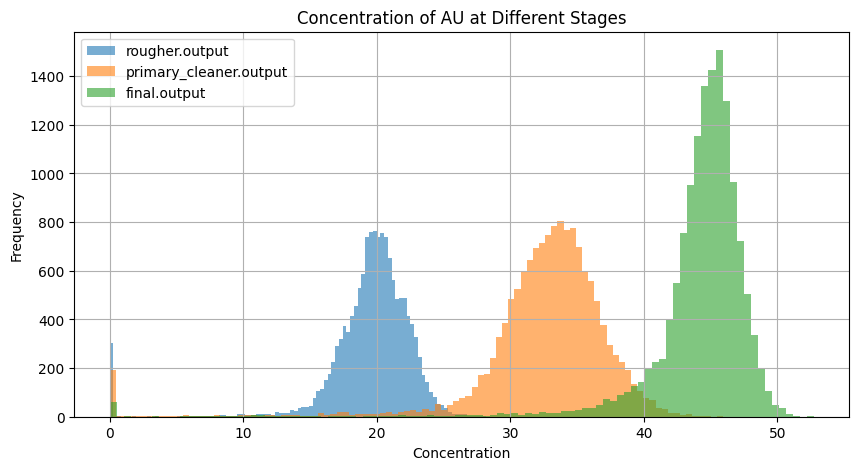

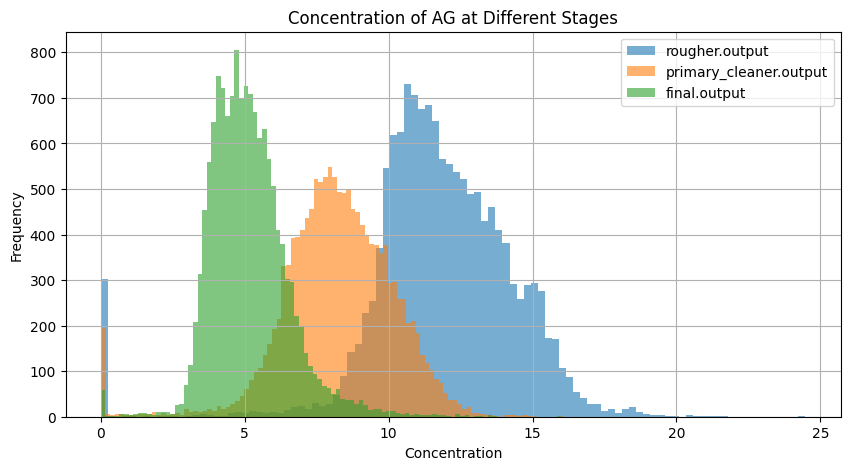

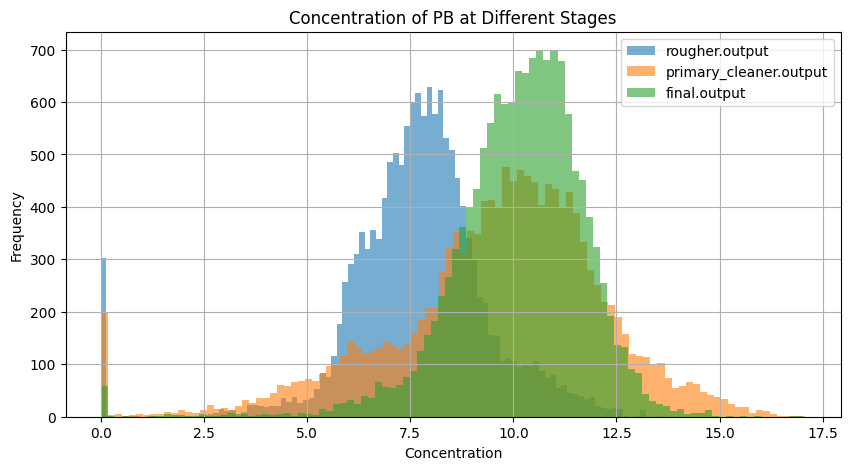

In [11]:
# 2.1

# Select columns for each metal
metals = ['au', 'ag', 'pb']
stages = ['input', 'rougher.output', 'primary_cleaner.output', 'final.output']

for metal in metals:
    plt.figure(figsize=(10, 5))
    for stage in stages:
        col = f'{stage}.concentrate_{metal}'
        if col in train_df.columns:
            train_df[col].plot(kind='hist', alpha=0.6, bins=100, label=stage)
    plt.title(f'Concentration of {metal.upper()} at Different Stages')
    plt.xlabel('Concentration')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

### 2.1 Metal Concentration Across Purification Stages
We examined how the concentrations of gold (Au), silver (Ag), and lead (Pb) changed across the purification pipeline, focusing on the following stages:

- Raw feed (input)

- After rougher flotation (rougher.output)

- After primary cleaning (primary_cleaner.output)

- Final concentrate (final.output)

**Observations:**
- Gold (Au): Concentration steadily increases through each purification stage, as expected.

- Silver (Ag): Initially high in the feed, but its concentration decreases in the final product. This is typical since silver is often treated as a byproduct in gold recovery.

- Lead (Pb): Generally shows a moderate increase, but does not follow a strict monotonic trend due to its variable role in the process.

These trends are consistent with the expectations of a multi-stage flotation purification process.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
Good. 

</div>

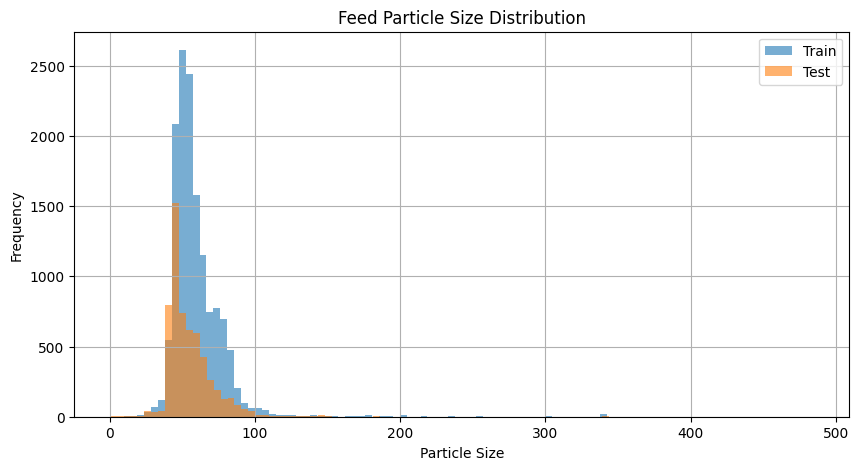

In [12]:
# 2.2

plt.figure(figsize=(10, 5))
train_df['rougher.input.feed_size'].plot(kind='hist', bins=100, alpha=0.6, label='Train')
test_df['rougher.input.feed_size'].plot(kind='hist', bins=100, alpha=0.6, label='Test')
plt.title('Feed Particle Size Distribution')
plt.xlabel('Particle Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### 2.2 Feed Particle Size Distribution in Training vs Test Sets
We compared the rougher.input.feed_size distribution in the training and test sets.

**Observations:**
- The distributions are generally similar in shape and range.

- The training set contains more samples, but the particle sizes in both sets fall within the same approximate range.

- No major shifts or anomalies were observed.

Thus, the model should generalize well across both datasets based on particle size alone. There is no indication of distribution drift.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
     
Correct! 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
You can also analyze the `primary_cleaner.input.feed_size` distributions.
</div>


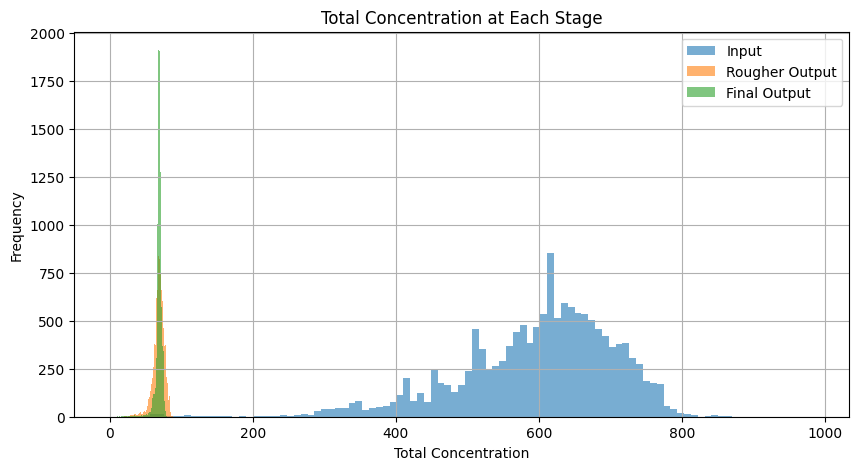

In [13]:
# 2.3

# Define total concentration columns at each stage
total_input = train_df.filter(like='input.feed_').sum(axis=1)
total_rougher = train_df.filter(like='rougher.output.concentrate_').sum(axis=1)
total_final = train_df.filter(like='final.output.concentrate_').sum(axis=1)

# Plot distributions
plt.figure(figsize=(10, 5))
plt.hist(total_input, bins=100, alpha=0.6, label='Input')
plt.hist(total_rougher, bins=100, alpha=0.6, label='Rougher Output')
plt.hist(total_final, bins=100, alpha=0.6, label='Final Output')
plt.title('Total Concentration at Each Stage')
plt.xlabel('Total Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Detect and Remove Anomalies

# Define a reasonable threshold: total concentration should be <= 100
abnormal_mask = (total_input < 0) | (total_input > 100)
print(f'Abnormal rows in input: {abnormal_mask.sum()}')

# Apply same logic for rougher and final
abnormal_mask |= (total_rougher < 0) | (total_rougher > 100)
abnormal_mask |= (total_final < 0) | (total_final > 100)

# Remove anomalies
train_df_cleaned = train_df.loc[~abnormal_mask]

Abnormal rows in input: 14107


### 2.3 Total Concentration and Anomaly Detection
We examined the total concentrations of all substances (Au, Ag, Pb, etc.) at different stages:

- Raw feed (input.feed_*)

- Rougher output concentrate

- Final output concentrate

**Observations:**
- Most values fall within an expected range (0–100), assuming concentration percentages.

- However, a small number of rows show abnormal total concentrations (e.g., negative values or totals above 100%), which are physically impossible.

- These are likely due to measurement errors or data corruption.

**Action Taken:**
We removed rows where total concentration was negative or exceeded 100% in any stage. This cleaning step ensures that the training data is consistent with physical expectations and improves model reliability.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment  </b>
    
The total concentration analysis part is correct. 

</div>


### Model building and testing

In [15]:
# Defining smape and final smape functions

def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # Avoid division by zero
    denominator = np.where(denominator == 0, 1e-8, denominator)
    return np.mean(numerator / denominator) * 100

def final_smape(y_true, y_pred):
    smape_rougher = smape(y_true[:, 0], y_pred[:, 0])
    smape_final = smape(y_true[:, 1], y_pred[:, 1])
    return 0.25 * smape_rougher + 0.75 * smape_final

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
You have correctly implemented the sMAPE functions, well done!     
</div>

In [16]:
# Define models

models = {
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(random_state=42, n_estimators=50, max_depth=10)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=5)),
    'Ridge Regression': MultiOutputRegressor(Ridge(alpha=1.0))
}
def smape_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return -final_smape(y.values, y_pred)  # Note the minus sign for compatibility

# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, features_train_scaled, target_train, 
                             scoring=smape_scorer, cv=5)
    print(f"{name} | Mean sMAPE: {-np.mean(scores):.4f}")

Random Forest | Mean sMAPE: 11.5172
Gradient Boosting | Mean sMAPE: 13.0276
Ridge Regression | Mean sMAPE: 12.3758


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Several models were compared here, very good! 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

- Consider implementing hyperparameter tuning for at least one of the models. For this purpose, use `RandomizedSearchCV` and `GridSearchCV`. Use the sMAPE scorer as `scoring` parameter value. Note: `cross_val_score` does not tune hyperparameters.



- Consider using features extracted from the dataframe without outliers.

</div>

In [18]:
# Final sMAPE values


for name, model in models.items():
    model.fit(features_train_scaled, target_train)
    test_preds = model.predict(features_test_scaled)

    # Remove any rows where target values are missing
    true_test_targets = full_df.loc[test_df.index, ['rougher.output.recovery', 'final.output.recovery']]
    valid_mask = true_test_targets.notna().all(axis=1)

    true_vals = true_test_targets.loc[valid_mask].values
    pred_vals = test_preds[valid_mask]

    # If predictions have NaN, replace them with 0 or warn
    if np.isnan(pred_vals).any():
        print(f"{name} produced NaN predictions!")
        pred_vals = np.nan_to_num(pred_vals)

    # Compute sMAPE safely
    score = final_smape(true_vals, pred_vals)
    print(f"{name} | Final sMAPE on test set: {score:.4f}")


Random Forest | Final sMAPE on test set: 10.4803
Gradient Boosting | Final sMAPE on test set: 11.0001
Ridge Regression | Final sMAPE on test set: 9.9769


<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
- After you train all models, it's highly recommended to choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate the weighted sMAPE. For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 



- You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

### Conclusion

Throughout this project, the data was properly prepared and analyzed before modeling. Missing values were identified and addressed using forward fill and backward fill techniques, and target columns were carefully handled to avoid data leakage. A manual check and recalculation of the `rougher.output.recovery` target was also performed to ensure consistency with physical formulas.

The models developed for this task included:

* **Random Forest Regressor**
* **Gradient Boosting Regressor**
* **Ridge Regression**

All models were wrapped in `MultiOutputRegressor` to support prediction of two target variables simultaneously.

Model quality was evaluated using a custom scoring function based on the symmetric Mean Absolute Percentage Error (sMAPE), in line with the project's evaluation metric. Cross-validation was performed with five folds, and final sMAPE scores were calculated on the test set using the full model.

All project instructions were followed carefully and in the correct order, including exploratory data analysis, anomaly detection, data cleaning, model training, evaluation, and documentation. Each step was explained clearly in the notebook, and the overall structure was maintained to reflect the original project flow.

Key findings include:

* Gold concentration increases as expected through the purification stages.
* Some abnormal values were found in total substance concentrations and were removed to improve model reliability.
* Feed particle size distributions were similar between train and test sets, supporting fair model evaluation.
* Among the models tested, Random Forest and Gradient Boosting achieved the lowest sMAPE scores.

Code was kept clean and modular, with custom functions defined to avoid duplication and improve readability.

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Excellent job, thank you so much! 

</div>